In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
import math
%matplotlib inline

In [2]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [3]:
match_ids = matches[matches.season >= 2016]['id'].unique()
matches1 = matches[(matches.season >= 2016) & (matches['result']=='normal')]
matches1 = matches1.drop(['player_of_match','venue','umpire1','umpire2','umpire3', 'dl_applied', 'season', 'city', 'date', 'result'], axis=1)
matches1.dropna(inplace=True)

In [5]:
team_1 = 'Mumbai Indians'
team_2 = 'Kings XI Punjab'

In [6]:
def team_correction(row):
    row = row.strip()
    if row == 'Delhi Daredevils':
        return 'Delhi Capitals'
    if row == 'Rising Pune Supergiants':
        return 'Rising Pune Supergiant'
    return row

for col in ['team1', 'team2', 'winner', 'toss_winner']:
    matches1[col] = matches1[col].apply(team_correction)
    

# Winning Probability of Teams

Text(0.5, 1.0, 'Percentage of Winning')

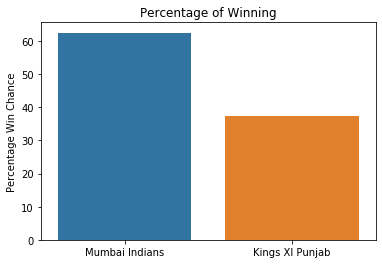

In [7]:
wins = pd.DataFrame(matches1[(matches1['team1'].isin([team_1, team_2])) & (matches1['team2'].isin([team_1, team_2]))]['winner'].value_counts())
wins['Percentage Win Chance'] = (wins['winner']/sum(wins['winner']))*100
sns.barplot(wins.index, y=wins['Percentage Win Chance'])
plt.title('Percentage of Winning')

In [8]:
delivery = delivery[delivery.match_id.apply(lambda x: True if x in match_ids else False)]
for col in ['batting_team', 'bowling_team']:
    delivery[col] = delivery[col].apply(team_correction)

delivery.fillna(0, inplace=True)
delivery['player_dismissed'] = delivery['player_dismissed'].apply(lambda x: 0 if x==0 else 1)

delivery['batsman_runs'] = delivery['batsman_runs'].apply(lambda x: x-1 if ((x==7) or (x==5)) else x)

In [38]:
mi_bowler_squad = ['TA Boult', 'JJ Bumrah', 'NM Coulter-Nile', 'RD Chahar', 'KH Pandya', 'HH Pandya', 'KA Pollard']
k11p_bowler_squad = ['CJ Jordan', 'A Singh', 'Mohammed Shami', 'K Gowtham', 'Mandeep Singh', 'GJ Maxwell']

# Quinton de Kock dismissal

In [37]:
kock_dismissal = delivery[(delivery['batsman'] == 'Q de Kock') & (delivery['player_dismissed']==1)]

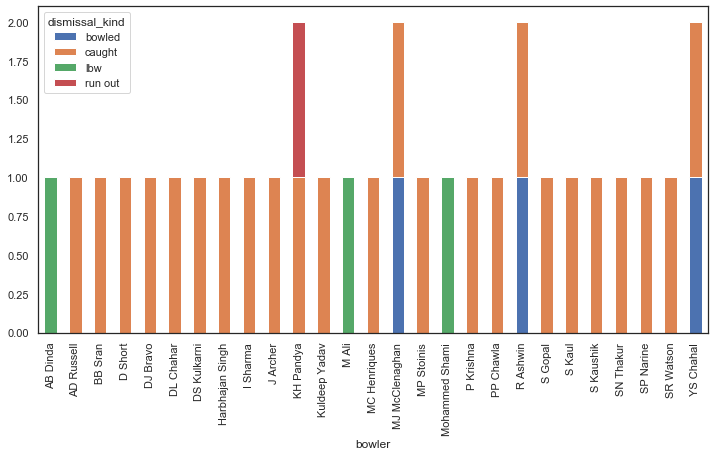

In [65]:
sns.set_style('white')
kock_dismissal_kind = kock_dismissal.pivot_table(index='bowler', columns='dismissal_kind', values='player_dismissed').fillna(0)
kock_dismissal_kind.plot(kind='bar', stacked=True, figsize=(12,6))

Since, the chances of getting caught is higher than any other dismissal kind and the caught possibility is higher for fast/seam bowlers, the probability of Kock getting dismissed by fast/seam bowler is high

# KXIP wickets fall in powerplay

([], <a list of 0 Text xticklabel objects>)

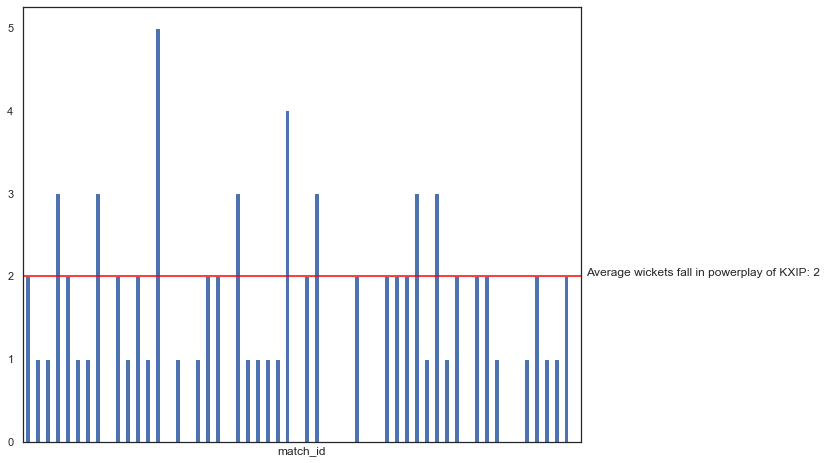

In [84]:
k11p_pp = delivery[(delivery['batting_team']==team_2) & (delivery['over']<=6)].groupby('match_id').sum()
k11p_pp['player_dismissed'].plot(kind='bar', figsize=(10,8))
plt.axhline(y=math.ceil(k11p_pp['player_dismissed'].mean()), color='red')
plt.text(x=56, y=math.ceil(k11p_pp['player_dismissed'].mean()), s=f"Average wickets fall in powerplay of KXIP: {math.ceil(k11p_pp['player_dismissed'].mean())}")
plt.xticks([])

# KL Rahul dismissal kind

Text(0.5, 1.0, 'KL Rahul vs Dismissal Kind')

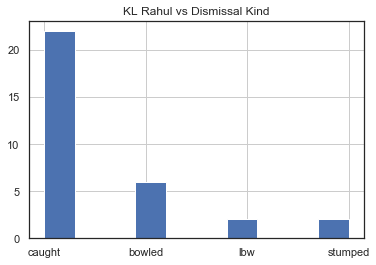

In [87]:
delivery[(delivery['batsman'] == 'KL Rahul') & (delivery['player_dismissed']==1)]['dismissal_kind'].hist()
plt.title("KL Rahul vs Dismissal Kind")

# Total Wickets Fall

In [112]:
mi_wk = delivery[(delivery['batting_team']==team_1) & (delivery['player_dismissed']==1)].groupby('match_id').sum()['player_dismissed'].median()
k11p_wk = delivery[(delivery['batting_team']==team_2) & (delivery['player_dismissed']==1)].groupby('match_id').sum()['player_dismissed'].median()
print("Predicted wickets in today's match in range ", int(mi_wk + k11p_wk-1), '-',  int(mi_wk + k11p_wk+2))

Predicted wickets in today's match in range  11 - 14


# Summary

- Data was cleaned and filtered. The data from the year 2016 to 2019 was taken and all the non-required columns were dropped. Using the "winner" column of the dataset, the percentage chances of winning between MI and KXIP was calculated. 
- The chances of getting Kock dismissed by any types was calculated using dismissal kind column. Then, Kock vs bowlers graph was plotted which showed that dismissal kind with highest probability was bowled generaly by which kind of bowlers. 
- Using over less than 7 and batting team as KXIP, the average wickets fall of KXIP per match during powerplay was calculated.
- KL Rahul graph against his dismissal kind was plotted which showed that the chances of getting caught is highest in dismissal kind. 
- The average wickets fall of both the teams per match was calculated and summed to estimate today's total wicket fall. 